# Bay Wheels Bike Trip Data

Bay Wheels is a shared bike rental service run by Lyft in the Bay Area, San Fransisco. Before Lyft's aquisition of Motivate in June 2019, the system was previously named Ford Go.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set()

In [2]:
# import dataset as dataFrame
df = pd.read_csv('201801-fordgobike-tripdata.csv')

In [3]:
# explore dataSet
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
43749,733,2018-01-19 12:33:04.0750,2018-01-19 12:45:17.6690,134,Valencia St at 24th St,37.752428,-122.420628,58,Market St at 10th St,37.776619,-122.417385,1679,Subscriber,1965.0,Female,No
53836,949,2018-01-16 17:32:37.9010,2018-01-16 17:48:27.6130,243,Bancroft Way at College Ave,37.869360,-122.254337,270,Ninth St at Heinz Ave,37.853489,-122.289415,2727,Subscriber,1989.0,Male,No
21943,310,2018-01-26 06:43:04.3660,2018-01-26 06:48:14.6230,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,176,MacArthur BART Station,37.828410,-122.266315,1192,Subscriber,1988.0,Male,No
51234,339,2018-01-17 09:37:02.6030,2018-01-17 09:42:42.4060,90,Townsend St at 7th St,37.771058,-122.402717,66,3rd St at Townsend St,37.778742,-122.392741,2036,Subscriber,1982.0,Male,No
59103,604,2018-01-14 23:48:44.0680,2018-01-14 23:58:48.2020,6,The Embarcadero at Sansome St,37.804770,-122.403234,8,The Embarcadero at Vallejo St,37.799953,-122.398525,1946,Customer,NaN,NaN,No


In [4]:
# explore data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


### Categorisation of Features

Below I have categorised the features between qualitative (nominal and ordinal) vs qualitative. This is to get a better understanding of the data avaliable to analyse as well as aid as a tool for choosing plot type thorughout the exploratory analysis. 

#### Qualitative Nominal
* start_station_id           
* start_station_name
* end_station_id             
* end_station_name 
* user_type
* bike_id
* member_birth_year          
* member_gender

#### Qualitative Ordinal 
* none present in dataset

#### Quantitative
* duration_sec 
* start_station_latitude     
* start_station_longitude   
* end_station_latitude       
* end_station_longitude   

#### Quantitative - Time Series        
* start_time                  
* end_time

<b>NOTE:</b> All of the features in the data set are self explanatory other than user type which needs some clarification. Subscriber refers to a member of the service, customer refers to a casual user of the serivce. 
   

### Quetions asked of DataSet
    
#### Demographics

* What are the ages bike users?
* What are the gender of the bike users?
* Are the users of the bikes customers or subscribers?

#### Duration

* How long do users use the bikes for?
* How does this vary based on our demographics i.e. does age, gender or user_type impact the duration of our trips

#### Geography

* Where are the users using the bikes?
* Are there areas of the city where the use of the bikes are more popular than others?
* Are the bikes appropriately deployed accross the city?

#### Time
* At what time of day do our users use the bikes?
* How does this change dependant on weekday?
* How does this vary based on our demographics?
* Does trip duration vary depending on when the bikes are rented? 

## Clean Data

<b>NOTE:</b> since the purpose of this project is not to wrangle the data, I have simply droped the member_birth_year 
and member_gender columns containing NaN rather than trying to gather via another method. There is more than enough
data remaining to perform the exploratory visualiations. 

In [5]:
df = df.dropna()

# Exploring Demographics

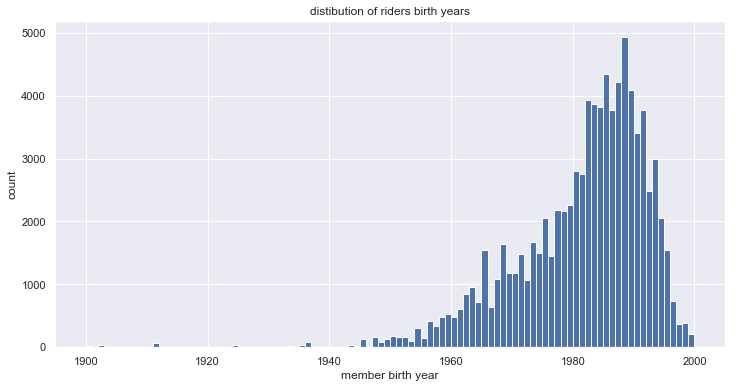

In [6]:
# What are the ages bike users?

plt.figure(figsize = (12,6))
plt.hist(data = df, x = 'member_birth_year', bins = 100);
plt.xlabel('member birth year');
plt.ylabel('count');
plt.title('distibution of riders birth years');

To be clear, the above is the distribution of the birth years of the rider for all rides. Since there is no way in the data to distinguish between members, if the same rider has ridden twice this is counted twice within the distribution. 

Unimodal.
Left skewed. 

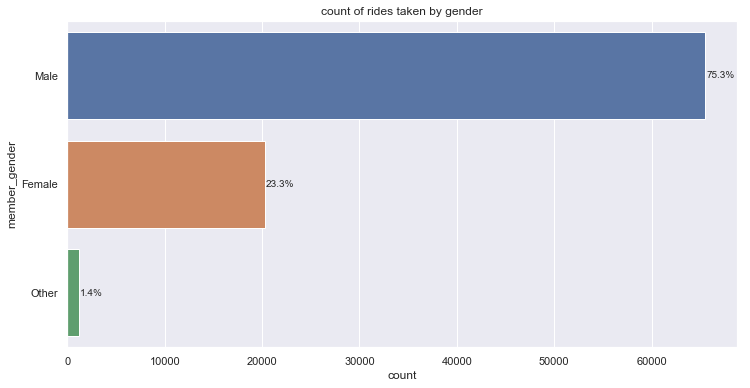

In [7]:
# What are the gender of the bike users?

plt.figure(figsize = (12,6))
sb.countplot(data = df, y = 'member_gender')

n_gender = df.shape[0]
type_counts = df['member_gender'].value_counts()

for i in range(type_counts.count()):
    count = type_counts[i]
    plot_str = ('{:0.1f}%' .format(100 * count / n_gender))
    plt.text(count+100, i, plot_str, va = 'center')
    

plt.title('count of rides taken by gender');

There is a clear difference between the number of males vs females using the service with 25% femal and 75% male. 

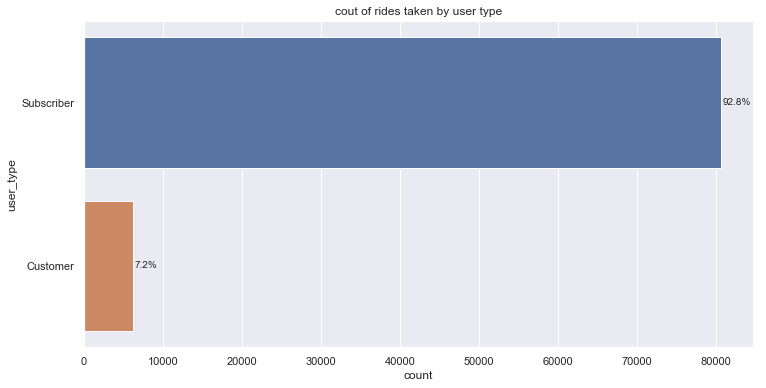

In [8]:
# Are the users of the bikes customers or subscribers?

plt.figure(figsize = (12,6))
sb.countplot(data = df, y = 'user_type')

n_gender = df.shape[0]
type_counts = df['user_type'].value_counts()

for i in range(type_counts.count()):
    count = type_counts[i]
    plot_str = ('{:0.1f}%' .format(100 * count / n_gender))
    plt.text(count+100, i, plot_str, va = 'center')
    
plt.title('cout of rides taken by user type');

Over 90% of the riders using the service are subscribers to the service vs less than 10% customers. 

It would be intresting to know if gender has an impact on if a rider will sign up to the service as a subscriber or use the service as a customer. 

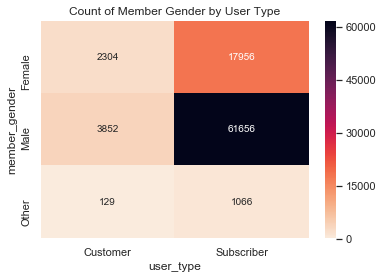

In [9]:
# plot heatmap showing counts of gender by user_type

ct_counts = df.groupby(['member_gender', 'user_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')

sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'rocket_r');

plt.title('Count of Member Gender by User Type');

The proportions of Male Customers : Male Subscriber vs Female Customer : Female Subscriber is similar. 

## Exploring Duration

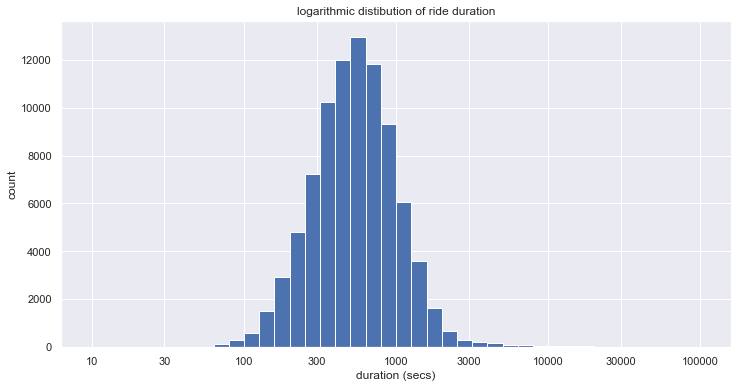

In [10]:
# How long do users use the bikes for?
bins = 10 ** np.arange(1, 5 + 0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize = (12,6))
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlabel('duration (secs)');
plt.ylabel('count');
plt.title('logarithmic distibution of ride duration');

Log normal distribution of duration of ride.

Unimodal.

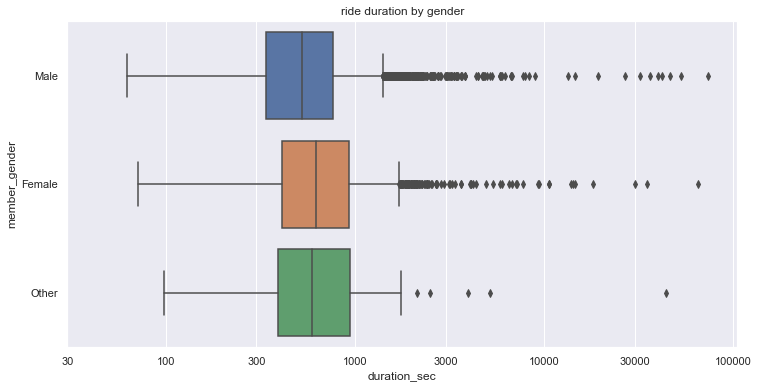

In [11]:
# How does duration vary based upon gender?

plt.figure(figsize = (12,6))
df_sample = df.sample(int(df.shape[0]*0.1))
ticks = [30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
sb.boxplot(data = df_sample, x = 'duration_sec', y = 'member_gender');
plt.xscale('log')
plt.xticks(ticks, labels);

plt.title('ride duration by gender');

Male median = 512
Female median = 620

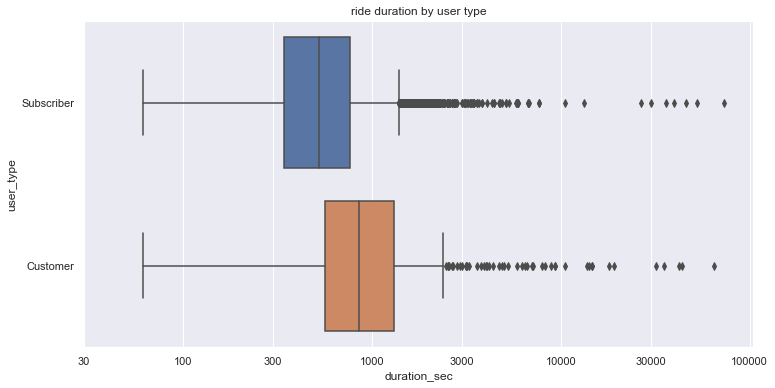

In [12]:
# How does duration vary based upon user type?

plt.figure(figsize = (12,6))
ticks = [30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]

sb.boxplot(data = df_sample, x = 'duration_sec', y = 'user_type');
plt.xscale('log')
plt.xticks(ticks, labels);

plt.title('ride duration by user type');

Subscribers appear to embark on shorter trips than customers.

Customer median = 879
Subscriber median = 518

There is a large enough difference here to be interested in why there is such a difference in behaviour with customer. When exploring geography, and time in sections below, pay close attention to user_type as a third dimension within these analysis. 

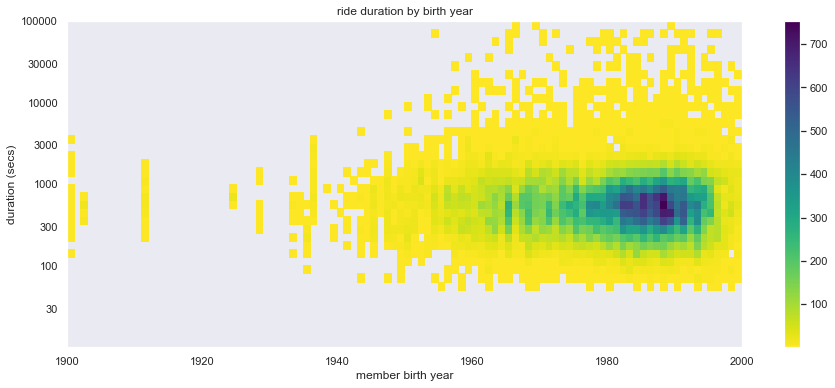

In [13]:
# How does duration vary based upon birth year?

plt.figure(figsize = (15.1,6))

y_bins = 10 ** np.arange(1, 5 + 0.1, 0.1)
x_bins = np.arange(1900, 2000 + 1, 1)

plt.hist2d(data = df, x = 'member_birth_year', y = 'duration_sec'
           , cmin = 0.1, cmap = 'viridis_r',
          bins = [x_bins, y_bins]);
plt.colorbar()
plt.yscale('log')
plt.yticks(ticks, labels);

plt.xlabel('member birth year');
plt.ylabel('duration (secs)');
plt.title('ride duration by birth year');

Unimodal distribution.

As expected based on univariate distributions plotted above. 

## Exploring Geography

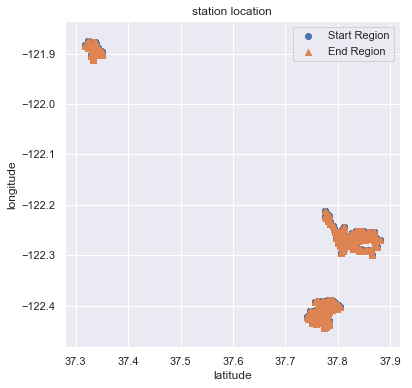

In [14]:
# Where are the users using the bikes? Check to see the different regions in which the service operates.

plt.figure(figsize = (6,6));
plt.scatter(data = df, x = 'start_station_latitude', y = 'start_station_longitude', marker = 'o');
plt.scatter(data = df, x = 'end_station_latitude', y = 'end_station_longitude', marker = '^');
plt.legend(['Start Region', 'End Region']);
plt.xlabel('latitude');
plt.ylabel('longitude');
plt.title('station location');

<b>NOTE:</b> it would be really interesting to explore this link at a future point.

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

Latitude/Longitude of journey start and journey end plotted encase there are some regions where people ride to but not from, this is not the case.

The plot confirms there are three distinct regions.

Looking at these lat/long on a map the three regions are South Bay, San Fransico and East Bay

In [15]:
# Function to determine region based on longitidue
def set_region(long):
    if long > -122:
        return 'South-Bay'
    elif long < -122 and long > -122.35:
        return 'East-Bay'
    elif long < -122.35:
        return 'San-Fransisco'
    
# Apply function to create two new features, region start and region end
df['start_region'] = df['start_station_longitude'].apply(set_region)
df['end_region'] = df['end_station_longitude'].apply(set_region)

Explore interactions between regions.

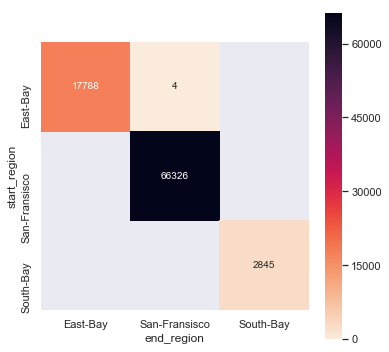

In [16]:
plt.figure(figsize = (6,6))
ct_counts = df.groupby(['start_region', 'end_region']).size()
ct_counts = ct_counts.reset_index(name = 'count')

total_rides = df.shape[0]

ct_counts = ct_counts.pivot(index = 'start_region', columns = 'end_region', values = 'count');

sb.heatmap(ct_counts, annot = True, fmt = '.0f', square = True, cmap = 'rocket_r');


The heat map above shows that there is close to zero interactions between the area, so interactions is not an area to explore further. 

What is of note is there is a clear difference in the demand accross the different regions. What would be interesting is to look at supply vs demand in these regions. 

In [17]:
# create demand metric ration of total rides per region
rides = df.groupby(['start_region']).count()['member_birth_year']
rides = rides.reset_index()

total_rides = df.shape[0]

rides['ratio'] = rides['member_birth_year'].apply(lambda x: x / total_rides)
rides = rides.drop('member_birth_year', axis = 1)

rides['metric'] = 'Rides'
rides['metric_type'] = 'Demand Metric'

print(rides)



    start_region     ratio metric    metric_type
0       East-Bay  0.204593  Rides  Demand Metric
1  San-Fransisco  0.762692  Rides  Demand Metric
2      South-Bay  0.032715  Rides  Demand Metric


In [18]:
# create demand metric ratio of total ride duration per region
duration = df.groupby(['start_region']).sum()['duration_sec']
duration = duration.reset_index()

total_duration = df['duration_sec'].sum()

duration['ratio'] = duration['duration_sec'].apply(lambda x: x / total_duration)

duration = duration.drop('duration_sec', axis = 1)

duration['metric'] = 'Duration'
duration['metric_type'] = 'Demand Metric'

print(duration)


    start_region     ratio    metric    metric_type
0       East-Bay  0.197340  Duration  Demand Metric
1  San-Fransisco  0.771422  Duration  Demand Metric
2      South-Bay  0.031237  Duration  Demand Metric


In [19]:
# create supply metric ratio of stations per region
stations = df.groupby(['start_station_id', 'start_region']).count()['member_birth_year']
stations = stations.reset_index()
total_stations = df['start_station_id'].nunique()
stations = stations.groupby('start_region').count()
stations = stations.reset_index()

stations['ratio'] = stations['start_station_id'].apply(lambda x: x / total_stations)

stations = stations.drop(['start_station_id','member_birth_year'], axis = 1)

stations['metric'] = 'Stations'
stations['metric_type'] = 'Supply Metric'

print(stations)

    start_region     ratio    metric    metric_type
0       East-Bay  0.399267  Stations  Supply Metric
1  San-Fransisco  0.446886  Stations  Supply Metric
2      South-Bay  0.153846  Stations  Supply Metric


In [20]:
# create supply metric ratio of bikes per region
bikes = df.groupby(['bike_id', 'start_region']).count()['member_birth_year']
bikes = bikes.reset_index()

total_unique_bikes = df['bike_id'].nunique()

bikes = bikes.groupby('start_region').count()
bikes = bikes.reset_index()

bikes['ratio'] = bikes['bike_id'].apply(lambda x: x / total_unique_bikes)

bikes = bikes.drop(['bike_id','member_birth_year'], axis = 1)

bikes['metric'] = 'Bikes'
bikes['metric_type'] = 'Supply Metric'

print(bikes)

    start_region     ratio metric    metric_type
0       East-Bay  0.378476  Bikes  Supply Metric
1  San-Fransisco  0.509977  Bikes  Supply Metric
2      South-Bay  0.121688  Bikes  Supply Metric


In [21]:
# create new dataFrame to combine metrics created above
ct_counts = rides.append(duration.append(stations).append(bikes))
ct_counts = ct_counts.reset_index()
ct_counts.to_csv('supply_demand.csv')

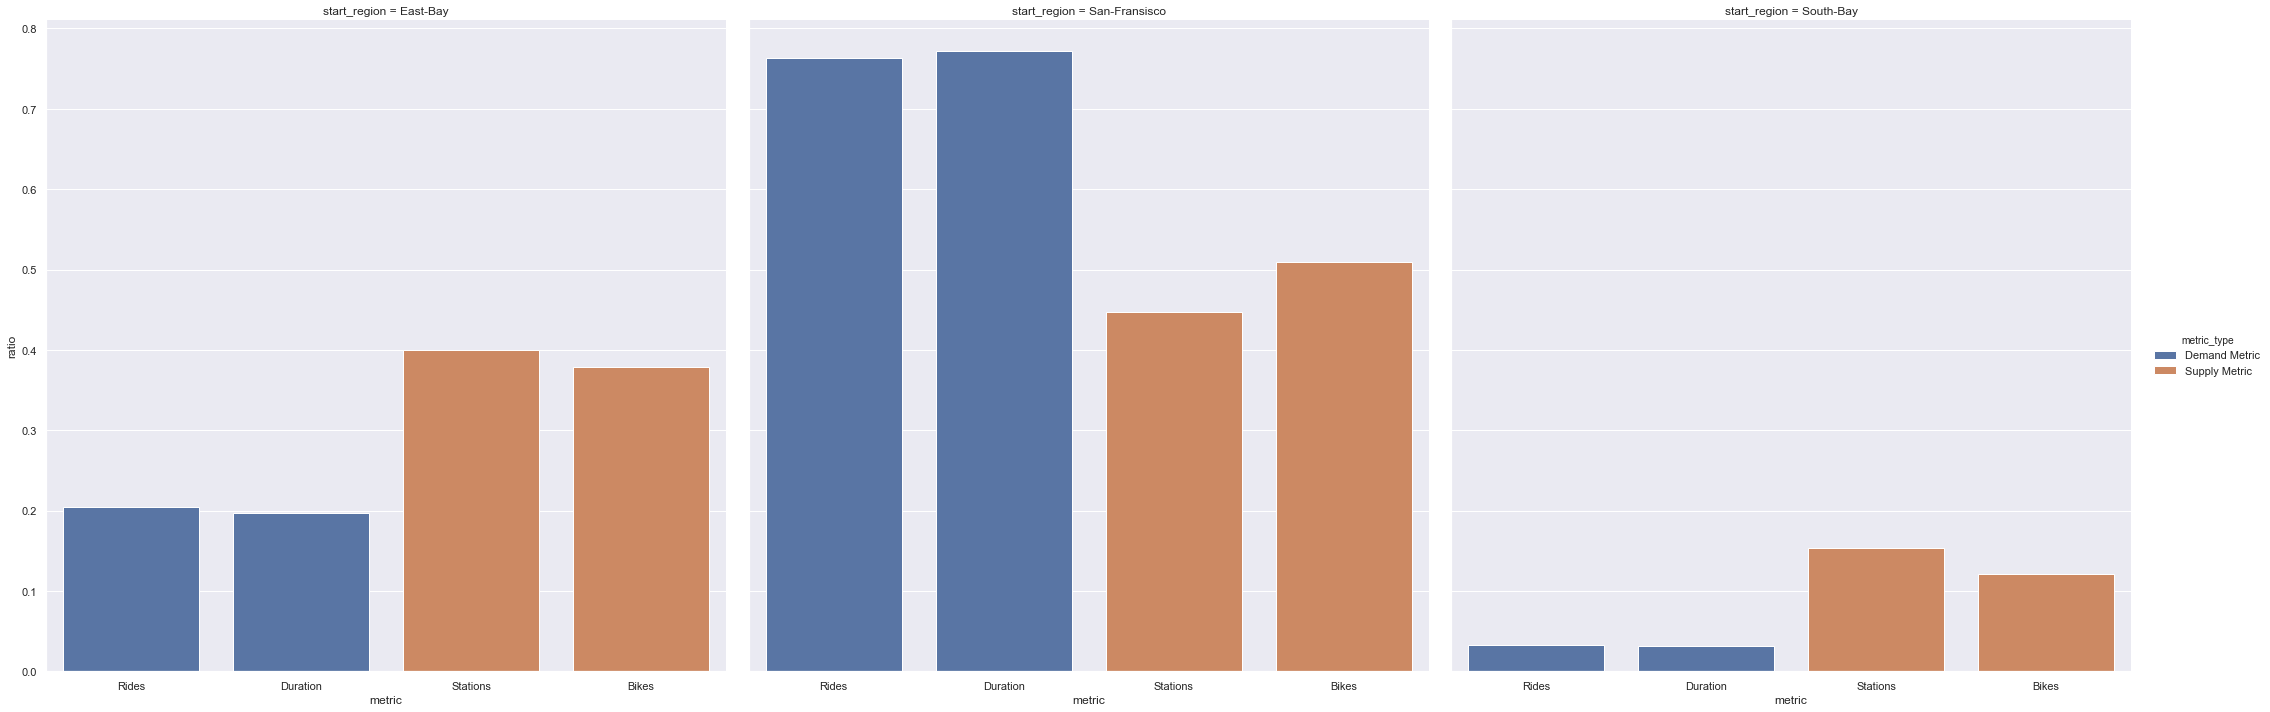

In [22]:
grid = sb.catplot(data = ct_counts, x = "metric", y = 'ratio', col="start_region", hue = 'metric_type', 
                  dodge = False, legend = True, kind="bar", height = 10);

There is a clear supply demand imbalance accross the regions looking at these metrics. 

Although not possible to determine from the data set, this may be impacting the quality of service where demand outstrips supply. At very least the service in areas where the converse is true will be better, as customers are much less likely to have to wait for a bike to be avaliable. 

## Exploring Time

In [23]:
# create new features start/end hour to use to group ride times
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_hour'] = df['start_time'].apply(lambda x: x.hour)
df['end_hour'] = df['end_time'].apply(lambda x: x.hour)

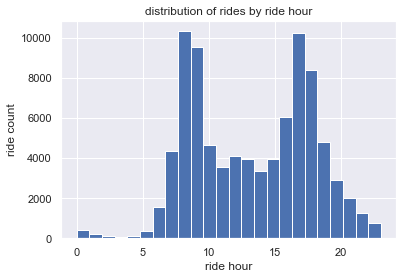

In [24]:
# At what time of day do our users use the bikes?
plt.hist(df['end_hour'], bins = 24);
plt.xlabel('ride hour');
plt.ylabel('ride count');
plt.title('distribution of rides by ride hour');

<b>NOTE:</b> Uses end hour as an estimation for ride hour.

Distribution is bi-modal i.e. there are two times of day where rides are most common. It will be interesting to investigate this further to see if this trend holds based on our demographics and on different days of the week. 

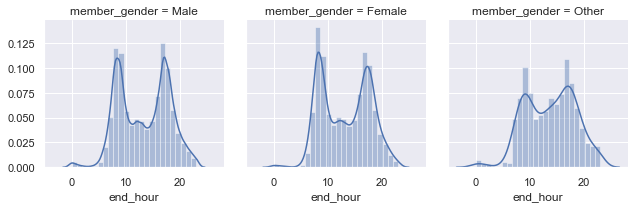

In [25]:
# How does this vary based on our gender?
grid = sb.FacetGrid(data = df, col = 'member_gender')
grid.map(sb.distplot, 'end_hour', bins = 24);

There is no clear distinction between gender i.e. both male and female show the same bi-modal distribution

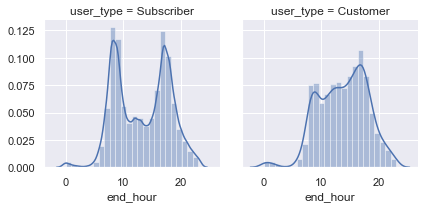

In [26]:
# How does this vary based on our user_type?
grid = sb.FacetGrid(data = df, col = 'user_type')
grid.map(sb.distplot, 'end_hour', bins = 24);

Interstingly there is a difference in the distribution between user types. Subscribers display the same bi-modal distribution as the overall distribution. The distribution displayed by customers is more bell shaped but left skewed. You could say it is bi-modal but this is far less pronouced. 

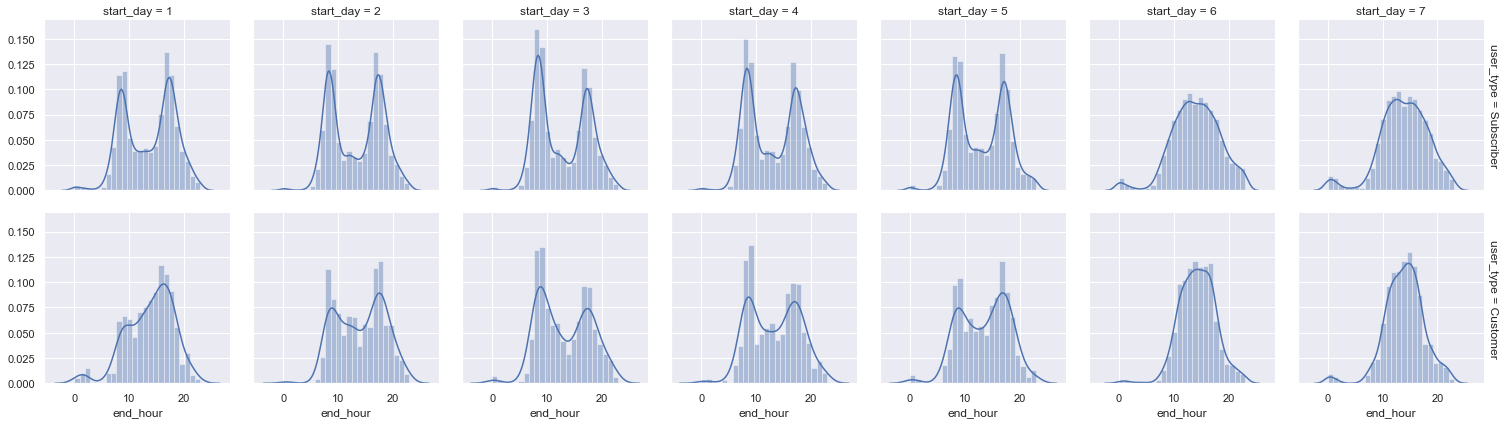

In [27]:
# How does this change dependant on weekday?

def day_of_week(day):
    if day == 1:
        return 'Monday'
    elif day == 2:
        return 'Tuesday'
    elif day == 3:
        return 'Wednesday'
    elif day == 4:
        return 'Thursday'
    elif day == 5:
        return 'Friday'
    elif day == 6:
        return 'Saturday'
    else:
        return 'Sunday'
    
def isweekday(day):
    if day < 6:
        return 'Weekday'
    else:
        return 'Weekend'


# create new feature start/end day to so we can split plots by days of week
df['start_day'] = df['start_time'].apply(lambda x: x.weekday() + 1)
df['end_day'] = df['end_time'].apply(lambda x: x.weekday() + 1)
df['day'] = df['end_day'].apply(day_of_week)
df['day_category'] = df['end_day'].apply(isweekday)

weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_ordinal = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays_order)
df['day'] = df['day'].astype(weekdays_ordinal)

day_cat_order = ['Weekday', 'Weekend']
day_cat_ordinal = pd.api.types.CategoricalDtype(ordered = True, categories = day_cat_order)
df['day_category'] = df['day_category'].astype(day_cat_ordinal)

# plot FacetGrid of density plots
grid = sb.FacetGrid(data = df, row = 'user_type', col = 'start_day', margin_titles = True)
grid.map(sb.distplot, 'end_hour', bins = 24);

We can see that Monday - Friday the bio-modal distribution holds for both subscribers and customers however at weekends we appear to have a normal distribution.

Given the overall distribution for subscribers (regardless of day of week) was bio-modal this must mean that we have far more subscribers riding during the week than at weekends.

Similarly, give the disribution for customers (regardless of day of week) was more normal, this must mean that we have far more customers riding at the weekend than during the week. 
 
We know that region 1 is more active than the other regions - so it is prudent to check that this trend noted above isn't caused by the difference in activitiy between regions. For isntance region 2 and 3 may have different trends weekends vs weekdays which isn't noted at the granularity above. 

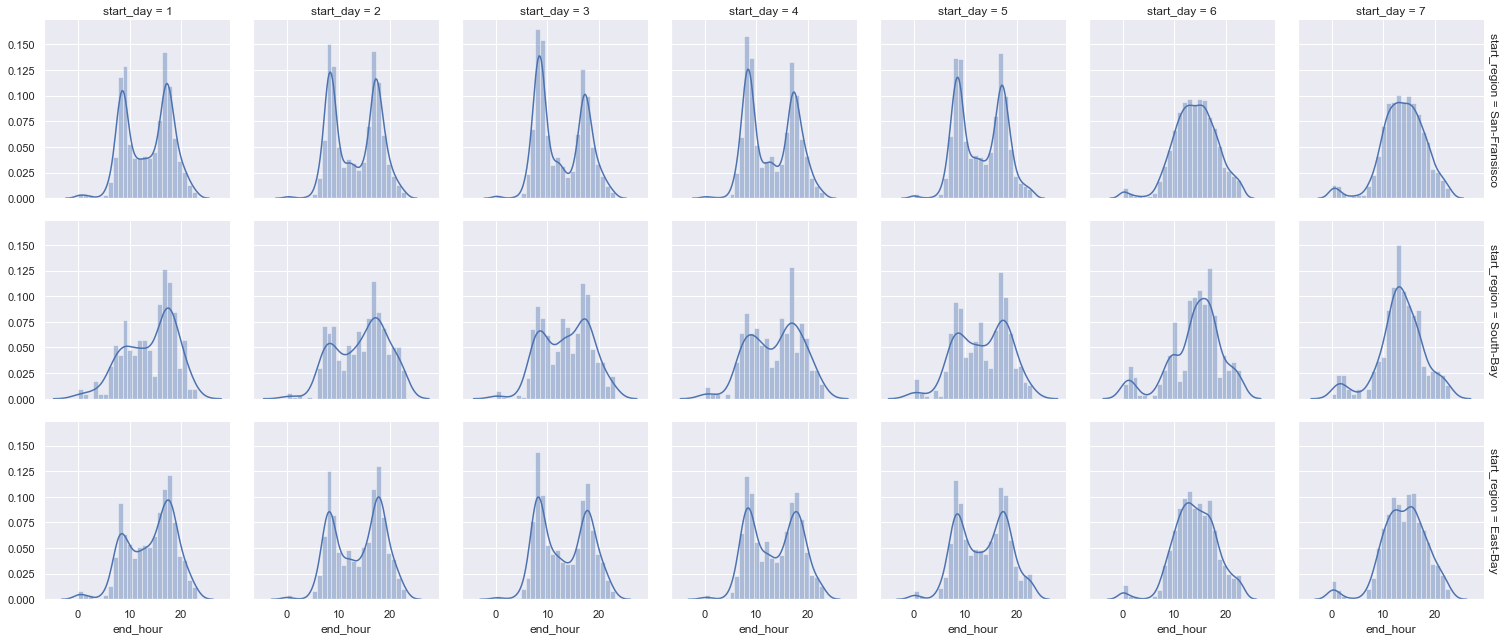

In [28]:
grid = sb.FacetGrid(data = df, row = 'start_region', col = 'start_day', margin_titles = True)
grid.map(sb.distplot, 'end_hour', bins = 24);

We can see from the plot above that the underlying trend is indeed caused by week day, not region. 

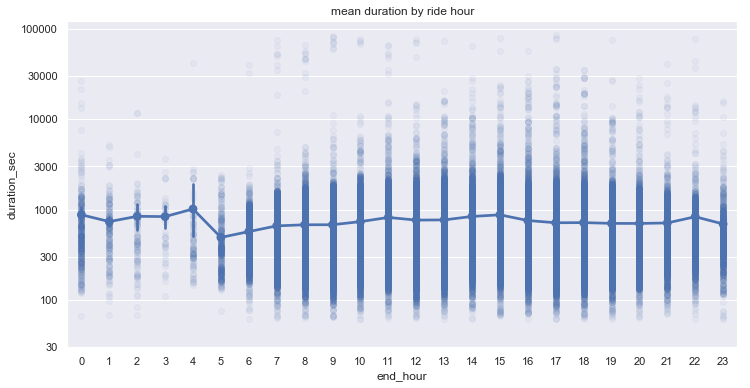

In [29]:
# Does trip duration vary depending on when the bikes are rented? 

plt.figure(figsize = (12,6))
ticks = [30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.scatter(data = df, x = 'end_hour', y = 'duration_sec', alpha = 0.05);
sb.pointplot(data = df, x = 'end_hour', y = 'duration_sec');
plt.yscale('log')
plt.yticks(ticks, labels);

plt.title('mean duration by ride hour');

The mdeian ride duration seems fairly constant regardless on the hour at which the ride is taken.

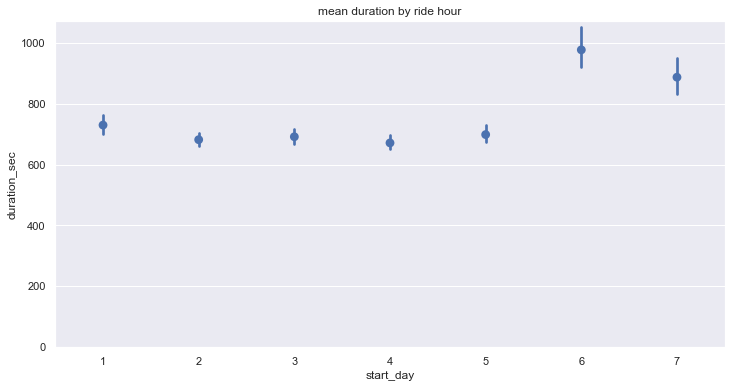

In [30]:
# Does trip duration vary depending on which day of the week bikes are rented? 

plt.figure(figsize = (12,6))
ticks = [30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', dodge = True, join = False);
#plt.yscale('log')
#plt.yticks(ticks, labels);
plt.yticks([0,200,400,600,800,1000])

plt.title('mean duration by ride hour');

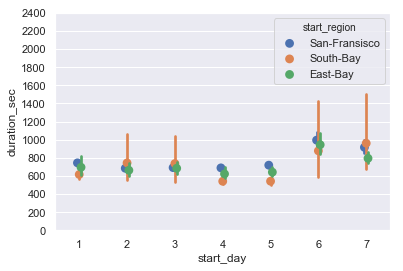

In [31]:
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', 
           hue = 'start_region', dodge = True, join = False);
#plt.yscale('log')
#plt.yticks(ticks, labels);
plt.yticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]);

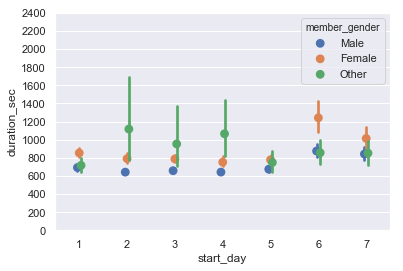

In [32]:
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', 
           hue = 'member_gender', dodge = True, join = False);
#plt.yscale('log')
#plt.yticks(ticks, labels);
plt.yticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]);

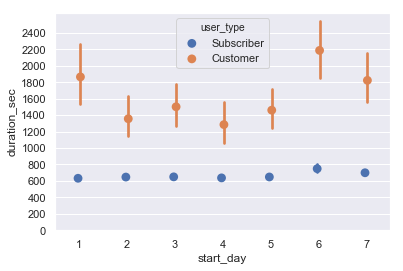

In [33]:
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', 
           hue = 'user_type', dodge = True, join = False);
#plt.yscale('log')
#plt.yticks(ticks, labels);
plt.yticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]);

In the three plots above the trend appears across all demographics and regions. The underlying trend appears to be caused by the day of the week.

In [34]:
df.to_csv('201801-fordgobike-tripdata_enhanced.csv')